In [1]:
%load_ext autoreload
%autoreload 2
from data_loader import load_datasets, create_data_loaders
import torch
from training_pipeline import train_with_different_parameters, plot_results
from training_pipeline import repeat_training
import os
from cnn_model import Net
import numpy as np
import random

SEED = 42


In [2]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [3]:
set_seed(SEED)
batch_size = 64

In [4]:
train, val, test = load_datasets((32, 32), apply_rotation=False,
                                                    apply_blur = False,
                                                    apply_brightness= False,
                                                    apply_cutout = False)
train_dat, val_dat, test_dat = create_data_loaders(train, val, test, batch_size)

### Learning rate test

In [5]:
set_seed(SEED)
train_with_different_parameters(5, Net, 10, train_dat, val_dat, test_dat, 'cuda', batch_size, lrs=[i/2000 for i in range(1,7)])

training iteration: 1 of 5
starting training...
epoch: 1, training loss: 0.026864057819048565, training accuracy: 35.54333333333334
epoch: 1, validation loss: 1.3596056567298041e-05, validation accuracy: 45.553333333333335
model saved

epoch: 2, training loss: 0.023253893184661867, training accuracy: 45.09777777777778
epoch: 2, validation loss: 9.53400731086731e-06, validation accuracy: 50.437777777777775
model saved

epoch: 3, training loss: 0.021886059845818415, training accuracy: 48.59222222222222
epoch: 3, validation loss: 1.2713295883602567e-05, validation accuracy: 52.85666666666667

epoch: 4, training loss: 0.020995864731735654, training accuracy: 51.07222222222222
epoch: 4, validation loss: 1.147241857316759e-05, validation accuracy: 55.04666666666667

epoch: 5, training loss: 0.02036107710931036, training accuracy: 52.60333333333333
epoch: 5, validation loss: 8.052271604537963e-06, validation accuracy: 56.403333333333336
model saved

epoch: 6, training loss: 0.0198342117084397

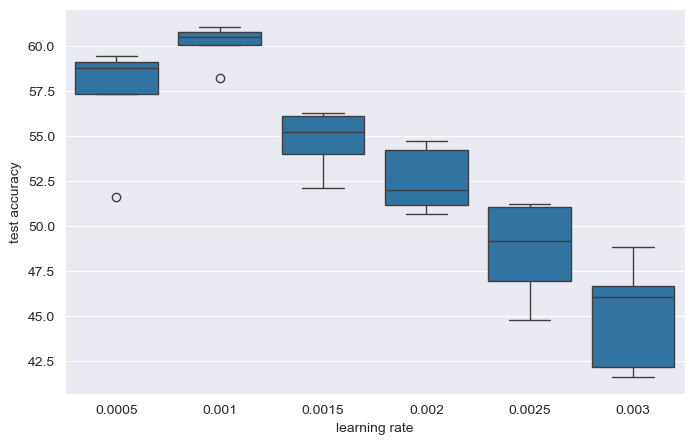

In [5]:
lrs = [i/2000 for i in range(1,7)]
plot_results(5, batch_sizes=[batch_size], lrs=lrs, dropouts=[0.5], betas=[(0.9,0.999)], x_values=lrs, x_label="learning rate")

### Dropout test

In [5]:
set_seed(SEED)
train_with_different_parameters(5, Net, 10, train_dat, val_dat, test_dat, 'cuda', batch_size, dropouts=[i/10 for i in range(3,8)])

training iteration: 1 of 5
starting training...
epoch: 1, training loss: 0.025519271704885695, training accuracy: 39.041111111111114
epoch: 1, validation loss: 1.1725966135660807e-05, validation accuracy: 47.632222222222225
model saved

epoch: 2, training loss: 0.021871849628951813, training accuracy: 48.9
epoch: 2, validation loss: 9.638751877678765e-06, validation accuracy: 53.31666666666667
model saved

epoch: 3, training loss: 0.020461461616886986, training accuracy: 52.71666666666667
epoch: 3, validation loss: 1.5207029713524713e-05, validation accuracy: 54.23888888888889

epoch: 4, training loss: 0.019610891047451232, training accuracy: 54.785555555555554
epoch: 4, validation loss: 1.349152856402927e-05, validation accuracy: 56.91888888888889

epoch: 5, training loss: 0.01897136344181167, training accuracy: 56.282222222222224
epoch: 5, validation loss: 1.2133418189154731e-05, validation accuracy: 58.39111111111111

epoch: 6, training loss: 0.01840299047364129, training accuracy: 

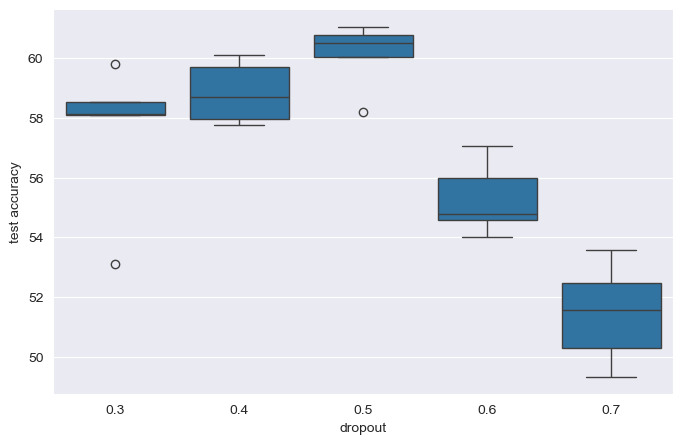

In [6]:
dropouts = [i/10 for i in range(3,8)]
plot_results(5, batch_sizes=[batch_size], lrs=[0.001], dropouts=dropouts, betas=[(0.9,0.999)], x_values=dropouts, x_label="dropout")

### Betas tests

In [6]:
set_seed(SEED)
train_with_different_parameters(5, Net, 10, train_dat, val_dat, test_dat, 'cuda', batch_size, betas=[(1-i/10, 1-i/1000) for i in range(2,6)])

training iteration: 1 of 5
starting training...
epoch: 1, training loss: 0.0264919051806132, training accuracy: 36.507777777777775
epoch: 1, validation loss: 1.4587538772159153e-05, validation accuracy: 47.16444444444444
model saved

epoch: 2, training loss: 0.02302271641890208, training accuracy: 46.06333333333333
epoch: 2, validation loss: 1.2178271346622044e-05, validation accuracy: 51.644444444444446
model saved

epoch: 3, training loss: 0.021815258909596336, training accuracy: 48.98555555555556
epoch: 3, validation loss: 1.1650627189212375e-05, validation accuracy: 53.63
model saved

epoch: 4, training loss: 0.021055379520522225, training accuracy: 51.24888888888889
epoch: 4, validation loss: 8.145835664537219e-06, validation accuracy: 54.434444444444445
model saved

epoch: 5, training loss: 0.020463518680466548, training accuracy: 52.59222222222222
epoch: 5, validation loss: 1.2533016999562582e-05, validation accuracy: 56.467777777777776

epoch: 6, training loss: 0.02011527396241

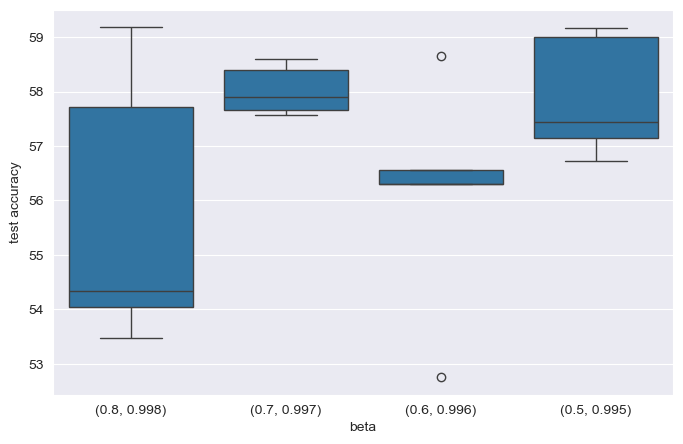

In [7]:
betas = [(1-i/10, 1-i/1000) for i in range(2,6)]
betas_str = [f"({1 - i / 10}, {1 - i / 1000})" for i in range(2,6)]
plot_results(5, batch_sizes=[batch_size], lrs=[0.001], dropouts=[0.5], betas=betas, x_values=betas_str, x_label="beta")

### Batch size test

In [5]:
set_seed(SEED)

batch_sizes = [32, 64, 128]
n = 5
epochs = 10
lr = 0.001
dropout = 0.5
beta = (0.9,0.999)
for batch_size in batch_sizes:
    train_dat, val_dat, test_dat = create_data_loaders(train, val, test, batch_size)
    newpath_history = f'output/history/cnn_lr={lr}_drop={dropout}_beta={beta}_batch={batch_size}/'
    newpath_model = f'output/models/cnn_lr={lr}_drop={dropout}_beta={beta}_batch={batch_size}/'
    if not os.path.exists(newpath_history):
        os.makedirs(newpath_history)
    if not os.path.exists(newpath_model):
        os.makedirs(newpath_model)
    history_path = os.path.join(newpath_history, 'history')
    model_path = os.path.join(newpath_model, 'model')
    repeat_training(n, Net, lr, model_path, history_path, epochs, train_dat, val_dat, test_dat, 'cuda', dropout=dropout)


training iteration: 1 of 5
starting training...
epoch: 1, training loss: 0.05039759537875652, training accuracy: 39.711666666666666
epoch: 1, validation loss: 1.5183766682942708e-05, validation accuracy: 50.33444444444444
model saved

epoch: 2, training loss: 0.043915733428465, training accuracy: 48.901666666666664
epoch: 2, validation loss: 1.3382056024339464e-05, validation accuracy: 54.617777777777775
model saved

epoch: 3, training loss: 0.04188518664340178, training accuracy: 51.507222222222225
epoch: 3, validation loss: 1.1609472168816461e-05, validation accuracy: 55.02444444444444
model saved

epoch: 4, training loss: 0.04063818845682674, training accuracy: 53.15611111111111
epoch: 4, validation loss: 1.1502995755937364e-05, validation accuracy: 56.50666666666667
model saved

epoch: 5, training loss: 0.03963812619547049, training accuracy: 54.33611111111111
epoch: 5, validation loss: 1.1228938897450765e-05, validation accuracy: 57.73
model saved

epoch: 6, training loss: 0.03875

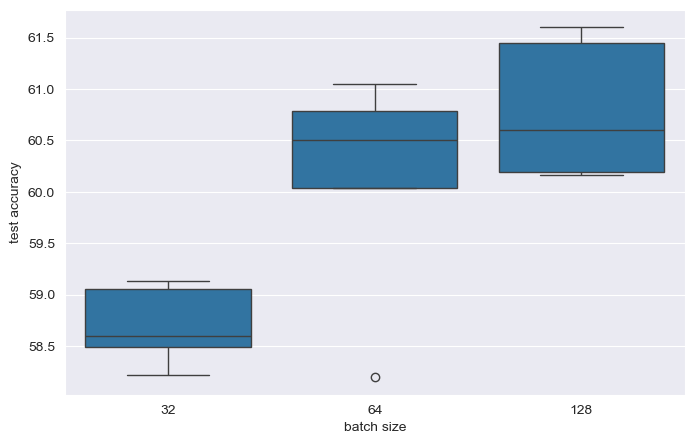

In [8]:
batch_sizes = [32, 64, 128]
batch_sizes_str = np.array(batch_sizes).astype(str)
plot_results(5, batch_sizes=batch_sizes, lrs=[0.001], dropouts=[0.5], betas=[(0.9,0.999)], x_values=batch_sizes_str, x_label="batch size")

### L2 penalty test

In [6]:
# testing l2 penalty -> for efficient net params criterion should be wrapped
set_seed(SEED)

batch_size = 64
train, val, test = load_datasets((32, 32))
train_dat, val_dat, test_dat = create_data_loaders(train, val, test, batch_size)

weight_decays = [0, 1e-5, 1e-4, 1e-3, 1e-2]
n = 5
epochs = 10
lr = 0.001
dropout = 0.5
beta = (0.9,0.999)
for weight_decay in weight_decays:
    newpath_history = f'output/history/cnn_weight_decay={weight_decay}/'
    newpath_model = f'output/models/cnn_weight_decay={weight_decay}/'
    if not os.path.exists(newpath_history):
        os.makedirs(newpath_history)
    if not os.path.exists(newpath_model):
        os.makedirs(newpath_model)
    history_path = os.path.join(newpath_history, 'history')
    model_path = os.path.join(newpath_model, 'model')
    repeat_training(n, Net, lr, model_path, history_path, epochs, train_dat, val_dat, test_dat, 'cuda', weight_decay=weight_decay, dropout=dropout)


training iteration: 1 of 5
starting training...
epoch: 1, training loss: 0.025008732084433237, training accuracy: 40.47666666666667
epoch: 1, validation loss: 1.3392582204606797e-05, validation accuracy: 51.562222222222225
model saved

epoch: 2, training loss: 0.021668088668584825, training accuracy: 49.55277777777778
epoch: 2, validation loss: 9.875502189000448e-06, validation accuracy: 55.416666666666664
model saved

epoch: 3, training loss: 0.02059345034095976, training accuracy: 52.20111111111111
epoch: 3, validation loss: 1.0190446509255304e-05, validation accuracy: 56.33888888888889

epoch: 4, training loss: 0.019864160547984972, training accuracy: 53.99888888888889
epoch: 4, validation loss: 1.0061990552478367e-05, validation accuracy: 57.96222222222222

epoch: 5, training loss: 0.019372041057215798, training accuracy: 55.257222222222225
epoch: 5, validation loss: 7.5657712088690865e-06, validation accuracy: 58.181111111111115
model saved

epoch: 6, training loss: 0.018937757581

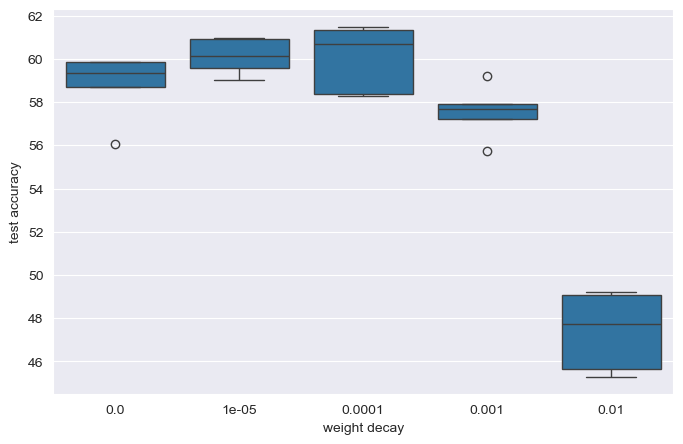

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from serialization import load

weight_decays = [0, 1e-5, 1e-4, 1e-3, 1e-2]
weight_decays_str = np.array(weight_decays).astype(str)
n = 5

data = []
for weight_decay in weight_decays:
    accuracy_results = []
    for i in range(1, n+1):
        newpath_history = f'output/history/cnn_weight_decay={weight_decay}/'
        history_path = os.path.join(newpath_history, f'history_{i}')
        history = load(history_path)
        accuracy_test = history["accuracy_test"]
        accuracy_results.append(accuracy_test)
    data.append(accuracy_results)
    
plot_data = []
for i in range(len(weight_decays_str)):
    param = weight_decays_str[i]
    results = data[i]
    for res in results:
        plot_data.append({"weight decay": param, "test accuracy": res})

df = pd.DataFrame(plot_data)

plt.figure(figsize=(8, 5))
sns.boxplot(x="weight decay", y="test accuracy", data=df)
plt.show()